<a href="https://colab.research.google.com/github/satyakipal99/LinkedIn-Job-Scrapper-using-Python-and-Selenium/blob/main/Copy_of_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## Scraping Jobs From LinkedIn

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [46.6 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,419 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadc

In [ ]:
import logging
from selenium import webdriver
import time
import random
import pandas as pd
from bs4 import BeautifulSoup
import os

In [ ]:
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [ ]:
driver = web_driver()
driver.implicitly_wait(10)

In [ ]:
'''
import logging
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import random
import time
'''
# Configure logging settings
logging.basicConfig(filename="scraping.log", level=logging.INFO)


def scrape_linkedin_jobs(job_title: str, location: str, pages: int = None) -> list:
    """
    Scrape job listings from LinkedIn based on job title, location and pages.

    Parameters
    ----------
    job_title : str
        The job title to search for on LinkedIn.
    location : str
        The location to search for jobs in on LinkedIn.
    pages : int, optional
        The number of pages of job listings to scrape. If None, all available pages will be scraped.

    Returns
    -------
    list of dict
        A list of dictionaries, where each dictionary represents a job listing
        with the following keys: 'job_title', 'company_name', 'location', 'posted_date',
        and 'job_description'.
    """

    # Log a message indicating that we're starting a LinkedIn job search
    logging.info(f'Starting LinkedIn job scrape for "{job_title}" in "{location}"...')

    # Sets the pages to scrape if not provided
    pages = pages or 1

    # Navigate to the LinkedIn job search page with the given job title and location
    driver.get(
        f"https://www.linkedin.com/jobs/search/?keywords={job_title}&location={location}"
    )

    # Scroll through the first 50 pages of search results on LinkedIn
    for i in range(pages):

        # Log the current page number
        logging.info(f"Scrolling to bottom of page {i+1}...")

        # Scroll to the bottom of the page using JavaScript
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        try:
            # Wait for the "Show more" button to be present on the page
            element = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located(
                    (By.XPATH, "/html/body/div[1]/div/main/section[2]/button")
                )
            )
            # Click on the "Show more" button
            element.click()

        # Handle any exception that may occur when locating or clicking on the button
        except Exception:
            # Log a message indicating that the button was not found and we're retrying
            logging.info("Show more button not found, retrying...")

        # Wait for a random amount of time before scrolling to the next page
        time.sleep(random.choice(list(range(3, 7))))

    # Scrape the job postings
    jobs = []
    soup = BeautifulSoup(driver.page_source, "html.parser")
    job_listings = soup.find_all(
        "div",
        class_="base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card",
    )

    try:
        for job in job_listings:
            # Extract job details

            # job title
            job_title = job.find("h3", class_="base-search-card__title").text.strip()
            # job company
            job_company = job.find(
                "h4", class_="base-search-card__subtitle"
            ).text.strip()
            # job location
            job_location = job.find(
                "span", class_="job-search-card__location"
            ).text.strip()
            # job link
            apply_link = job.find("a", class_="base-card__full-link")["href"]

            # Navigate to the job posting page and scrape the description
            driver.get(apply_link)

            # Sleeping randomly
            time.sleep(random.choice(list(range(5, 11))))

            # Use try-except block to handle exceptions when retrieving job description
            try:
                # Create a BeautifulSoup object from the webpage source
                description_soup = BeautifulSoup(driver.page_source, "html.parser")

                # Find the job description element and extract its text
                job_description = description_soup.find(
                    "div", class_="description__text description__text--rich"
                ).text.strip()

            # Handle the AttributeError exception that may occur if the element is not found
            except AttributeError:
                # Assign None to the job_description variable to indicate that no description was found
                job_description = None

                # Write a warning message to the log file
                logging.warning(
                    "AttributeError occurred while retrieving job description."
                )

            # Add job details to the jobs list
            jobs.append(
                {
                    "title": job_title,
                    "company": job_company,
                    "location": job_location,
                    "link": apply_link,
                    "description": job_description,
                }
            )
            # Logging scrapped job with company and location information
            logging.info(f'Scraped "{job_title}" at {job_company} in {job_location}...')

    # Catching any exception that occurs in the scrapping process
    except Exception as e:
        # Log an error message with the exception details
        logging.error(f"An error occurred while scraping jobs: {str(e)}")

        # Return the jobs list that has been collected so far
        # This ensures that even if the scraping process is interrupted due to an error, we still have some data
        return jobs

    # Close the Selenium web driver
    driver.quit()

    # Return the jobs list
    return jobs


def save_job_data(data: dict) -> None:
    """
    Save job data to a CSV file.

    Args:
        data: A dictionary containing job data.

    Returns:
        None
    """

    # Create a pandas DataFrame from the job data dictionary
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file without including the index column
    df.to_csv("jobs.csv", index=False)

    # Log a message indicating how many jobs were successfully scraped and saved to the CSV file
    logging.info(f"Successfully scraped {len(data)} jobs and saved to jobs.csv")


data = scrape_linkedin_jobs("Data analyst", "India",5)
save_job_data(data)

In [ ]:
df = pd.read_csv('jobs.csv')
print(df)

                                         title                  company  \
0                            Lead Data Analyst           Airtel Digital   
1     Senior Data Analyst (Power BI , Tableau)                   Ivanti   
2                    Jr. Data Analyst (Remote)          Rocket Learning   
3              Data Research Analyst Team Lead           Forbes Advisor   
4                                 Data Analyst          Mastech Digital   
..                                         ...                      ...   
140                               Data Analyst                   Turing   
141                     data analyst - Chennai  MNR Solutions Pvt. Ltd.   
142                             Data Analyst I               VARITE INC   
143  Business Intelligence Reporting Analyst I                  Paychex   
144                               Data Analyst                     Yugn   

                              location  \
0             Gurugram, Haryana, India   
1    Bangalore 

## Data Analysis

In [ ]:
df.head()

,title,company,location,link,description
0,Lead Data Analyst,Airtel Digital,"Gurugram, Haryana, India",https://in.linkedin.com/jobs/view/lead-data-an...,"At Airtel Digital, we are transforming from a ..."
1,"Senior Data Analyst (Power BI , Tableau)",Ivanti,"Bangalore Urban, Karnataka, India",https://in.linkedin.com/jobs/view/senior-data-...,Senior Recruiting Operations SpecialistWho We ...
2,Jr. Data Analyst (Remote),Rocket Learning,India,https://in.linkedin.com/jobs/view/jr-data-anal...,JOB ID: 63753Role: Jr. Data Analyst (Remote)Ye...
3,Data Research Analyst Team Lead,Forbes Advisor,"Mumbai, Maharashtra, India",https://in.linkedin.com/jobs/view/data-researc...,Company DescriptionLocation : MumbaiForbes Adv...
4,Data Analyst,Mastech Digital,"Hyderabad, Telangana, India",https://in.linkedin.com/jobs/view/data-analyst...,Title : Data Analyst Number of openings : 3 op...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        145 non-null    object
 1   company      145 non-null    object
 2   location     145 non-null    object
 3   link         145 non-null    object
 4   description  145 non-null    object
dtypes: object(5)
memory usage: 5.8+ KB


no null values are present in the csv file

In [ ]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143    False
144    False
Length: 145, dtype: bool


no duplicate values are present

In [ ]:
df.shape

(145, 5)

In [ ]:
df.isnull().sum()

title          0
company        0
location       0
link           0
description    0
dtype: int64

In [ ]:
df.describe()

,title,company,location,link,description
count,145,145,145,145,145
unique,74,103,29,145,124
top,Data Analyst,Turing,"Bengaluru, Karnataka, India",https://in.linkedin.com/jobs/view/lead-data-an...,A fast-growing company that is on a mission to...
freq,57,14,34,1,7


We can see top company with highest job postings is Turing with 14 posted jobs, and the most posted jobs are for the location Bengaluru, Karnataka, India with 34 jobs posted for this location.

In [ ]:
count = df.shape[0]
count

145

In [ ]:
df['location'].nunique()

29

In [ ]:
df['location'].value_counts()

Bengaluru, Karnataka, India          34
Hyderabad, Telangana, India          21
Pune, Maharashtra, India             11
Mumbai, Maharashtra, India           10
India                                 9
Pune/Pimpri-Chinchwad Area            6
Gurgaon, Haryana, India               6
Gurugram, Haryana, India              5
Noida, Uttar Pradesh, India           5
Delhi, Delhi, India                   5
Bengaluru North, Karnataka, India     5
Chennai, Tamil Nadu, India            3
Secunderābād, Telangana, India        3
Greater Kolkata Area                  2
Greater Bengaluru Area                2
Greater Hyderabad Area                2
Bangalore Urban, Karnataka, India     2
Greater Chennai Area                  2
Greater Delhi Area                    2
Delhi, India                          1
Faridabad, Haryana, India             1
Kota, Rajasthan, India                1
Uttar Pradesh, India                  1
Delhi Cantonment, Delhi, India        1
Mumbai Metropolitan Region            1


We can see top locations for the job postings are Bengaluru, Hyderabad, Pune and Mumbai.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Count of Jobs by Location')

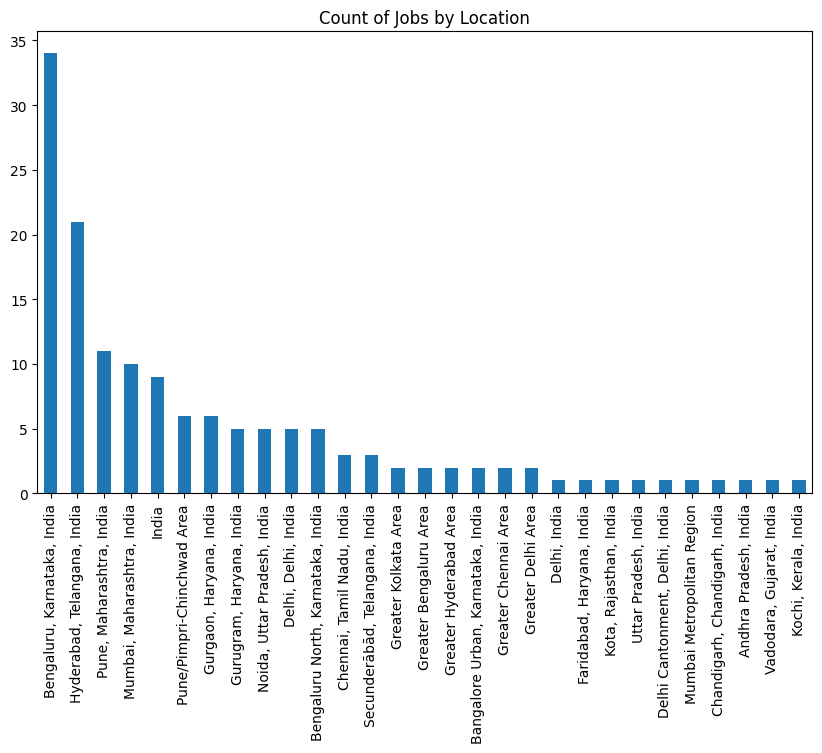

In [ ]:
plt.figure(figsize=(10,6))
df['location'].value_counts().plot.bar()
plt.title("Count of Jobs by Location")